In [2]:
import torch
import numpy as np
from torchvision import utils
from model import Generator

In [3]:
device = "cuda"
ckpt = "checkpoint/080000.pt"

g_ema = Generator(256, 512, 8)
g_ema.load_state_dict(torch.load(ckpt)['g_ema'], strict=False)
g_ema.eval()
g_ema = g_ema.to(device)

In [13]:
n_samples = 10000

sample_z = torch.randn(n_samples, 1, 512).to(device)

# Compute and convert each latent vector in order not to go out of memory
sample_w = np.concatenate([g_ema.style(z).detach().cpu().numpy() for z in sample_z])
# convert samples of Z to numpy
sample_z = sample_z.detach().cpu().numpy().reshape(n_samples, 512)

In [5]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)
pc_z = pca.fit_transform(sample_z)
pc_w = pca.fit_transform(sample_w) 

In [7]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt

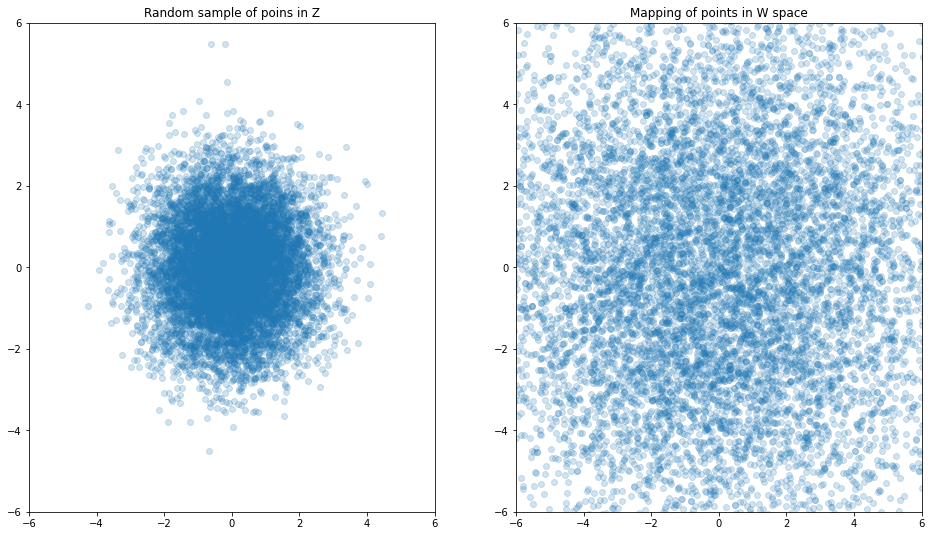

In [15]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=((16, 9)))

ax1.scatter(pc_z[:, 0], pc_z[:, 1], alpha=0.2)
ax1.set_xlim(-6, 6)
ax1.set_ylim(-6, 6)
ax1.set_title("Random sample of poins in Z")
ax2.scatter(pc_w[:, 0], pc_w[:, 1], alpha=0.2)
ax2.set_xlim(-6, 6)
ax2.set_ylim(-6, 6)
ax2.set_title("Mapping of points in W space")
plt.show()